In [1]:
#必要なパッケージの読み込み
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy

In [51]:
#目的別の変数設定
filename = 'second.csv' #読み込むcsvファイルの指定

rang = 11 #取得したROIの数
rang_o = 2 #fictive wave外の活動を見たいROI数
rang_w = 9 #fictive waveを形成するROI数

tlim_start = 1 #カルシウムトレースの描画範囲（開始時間）1/30未満の数だと壊れるので0は禁止
tlim_end = 280 #カルシウムトレースの描画範囲（終了時間）

rang_o_start = 1 #wave外のROIの内、描画するものを範囲指定。この場合1番目のROIを含んでいる。描画しないなら0
rang_o_end = 2 #wave外のROIの内、描画するものを範囲指定。この場合2番目のROIまでを含む。描画しないなら-1
rang_w_start = 3 #wave内のROIの内、描画するものを範囲指定。この場合3番目のROIを含んでいる。描画しないなら0
rang_w_end = 7 #wave内のROIの内、描画するものを範囲指定。この場合7番目のROIまでを含む。描画しないなら-1

In [52]:
#データ読み込み
Mean = []
for i in range(rang):
    Mean.append(np.array(pd.read_csv(filename)['Mean'+str(i+1)]))

time = np.arange(1, 1+len(Mean[0]), 1)/30

In [53]:
#色とラベルの指定

#色の指定
c = []
#wave外の色
for i in range(rang_o):
    c.append("hotpink")
#wave内の色
for i in range(rang_w):
    c.append("grey")
#全て別の色で指定したい場合は以下のコメントアウトのように指定
#c = ["red","orange","gold","green","blue","purple","black","red","orange","gold","green","blue","purple","black"]

#ラベルの指定
l = []
#wave外のラベルの指定
for i in range(rang_o):
    l.append("ex"+str(i+1))
#wave内のラベルの指定
for i in range(rang_w):
    l.append("m"+str(i+1))
#全て別のラベルで指定したい場合は以下のように指定
l = ["SEZ1","SEZ2","T2","T3","A1","A2","A3","A4","A5","A6","A7"]

In [54]:
#グラフの細かい指定

#グラフの大きさ
fig_size = (20.0, 10.0)

#凡例
anchor_legend = (1, 0.5) #凡例の位置
location_legend = "center" #凡例の細かい位置
font_legend = 24 #凡例の大きさ

#左下の数値
scale_t = 10 #時間軸の長さ
nori = 2 #左側にのりしろをどれだけ取るか
v_h = -2 #縦軸ラベルの横位置調整
h_h = 3 #時間軸ラベルの横位置調整

C:\Users\Sato\AppData\Local\Temp\ipykernel_6084\3238422543.py:82: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()              #レイアウトの設定


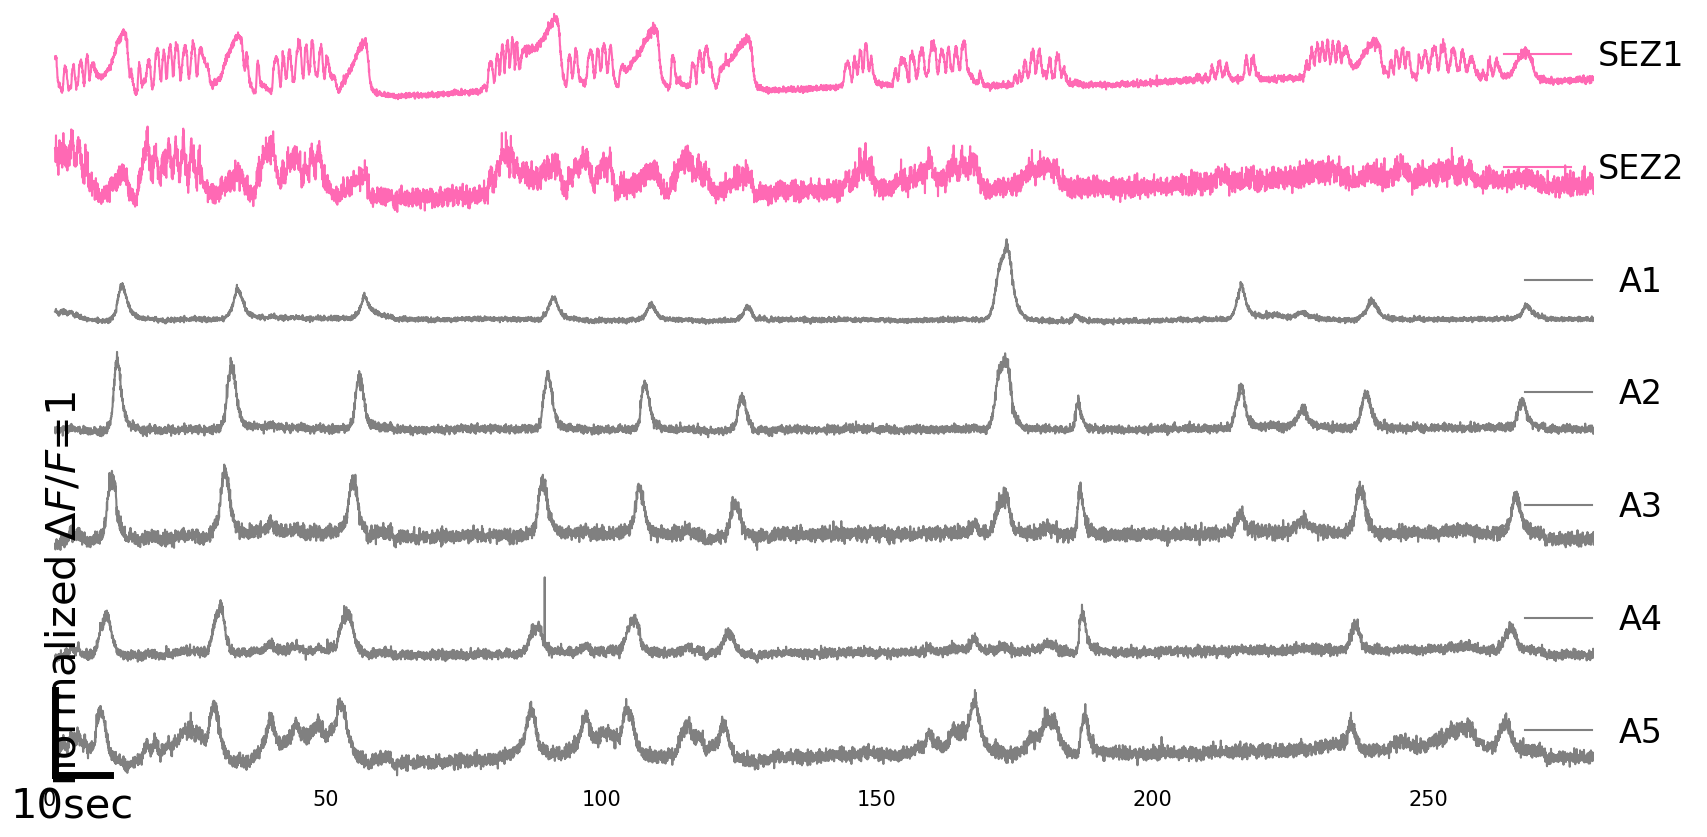

In [55]:
#傾きに補正かけた版

fig = plt.figure(figsize=fig_size)   #描画の大きさ指定

#yラベル入れたかったらコメントアウト外す
#plt.ylabel("F", fontsize = 24, y=0.55)
#plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['top'].set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)
#plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, bottom=False, left=False, right=False, top=False)

def func2(F, time):
        param = scipy.optimize.curve_fit(lambda t,a,b:a*np.exp(b*t), time , F, p0 = (F[0], -0.000001))[0]
        return param[0] * np.exp(param[1]*time)
#        return (F-exp_base)/exp_base

mmean = []
for i in range(rang):
    mmean.append([])
for i in range(rang):
    mmean[i] = func2(Mean[i], time)

#Mean = preprocessing.minmax_scale(mmean, axis=1)
MeanM = []
for i in range(rang):
    MeanM.append([])

for i in range(rang):
    MeanM[i] = (Mean[i] - mmean[i])/mmean[i]

mean = preprocessing.minmax_scale(MeanM, axis=1)

rang_o_rang = rang_o_end - rang_o_start + 1
rang_w_rang = rang_w_end - rang_w_start + 1
rang_draw = rang_o_rang + rang_w_rang

t_time = time[tlim_start*30-1:tlim_end*30]
t_mean = []
for i in range(rang):
    t_mean.append([])
for i in range(rang):
    t_mean[i] = mean[i][tlim_start*30-1:tlim_end*30]

ax = []
for i in range(rang_draw):
    ax.append(fig.add_subplot(rang_draw, 1, i+1))
    plt.xlim(tlim_start-nori,tlim_end)
    if i <= (rang_draw-2):
        plt.xticks(color="None")

plt.tick_params(labelsize=15)  

if rang_o_start > 0:
    for i in range(rang_o_rang):
        ax[i].plot(t_time, t_mean[i+rang_o_start-1], color=c[i+rang_o_start-1], label=l[i+rang_o_start-1])
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
        ax[i].spines['bottom'].set_visible(False)
        ax[i].spines['left'].set_visible(False)    
        ax[i].legend(bbox_to_anchor=anchor_legend, loc =location_legend, fontsize=font_legend, frameon=False)
        ax[i].tick_params(labelbottom=True, labelleft=False, labelright=False, labeltop=False)
        ax[i].tick_params(bottom=False, left=False, right=False, top=False)

if rang_w_start > 0:
    for i in range(rang_w_rang):
        ax[i+rang_o_rang].plot(t_time, t_mean[i+rang_o+rang_w_start-1], color=c[i+rang_o+rang_w_start-1], label=l[i+rang_o+rang_w_start-1])
        ax[i+rang_o_rang].spines['right'].set_visible(False)
        ax[i+rang_o_rang].spines['top'].set_visible(False)
        ax[i+rang_o_rang].spines['bottom'].set_visible(False)
        ax[i+rang_o_rang].spines['left'].set_visible(False)    
        ax[i+rang_o_rang].legend(bbox_to_anchor=anchor_legend, loc =location_legend, fontsize=font_legend, frameon=False)
        ax[i+rang_o_rang].tick_params(labelbottom=True, labelleft=False, labelright=False, labeltop=False)
        ax[i+rang_o_rang].tick_params(bottom=False, left=False, right=False, top=False)

ax[-1].plot([tlim_start,tlim_start,tlim_start+scale_t,tlim_start+scale_t], [0,0,0,0], c ="k", lw = 5)
ax[-1].plot([tlim_start,tlim_start,tlim_start,tlim_start], [0,0,1,1], c ="k", lw = 5)

ax[-1].text(tlim_start+h_h, -0.5, str(scale_t)+"sec", ha='center', fontsize = 30)
ax[-1].text(tlim_start+v_h, +2.2, "normalized $ΔF/F$=1", va='center', rotation=90, fontsize = 30)

fig.tight_layout()              #レイアウトの設定
plt.show()